# Pronoun Frequencies in Video Game Texts
***
By [Alejandro Ciuba](https://alejandrociuba.github.io), alc307@pitt.edu
***
## Summary
In this notebook, I will be examining the following:
1. The frequency of the 2nd person singular pronoun (_you_).
2. Examining the 2nd person singular pronoun in-context.
3. The frequencies of other pronouns used in similar cases.

All of this is on a _"gotten-data-level"_, while I suspect many things found here may apply to video games as a whole, broad assumptions relating to this topic requires more data.

### Contents
1. [Second Person Pronoun](#Exploring-Usage-of-the-2nd-Person-Pronoun)
2. ["You" Concordances](#"You"-Concordances)
3. [Other Pronouns](#Other-Pronouns)
***
## Python Imports

In [1]:
# Necessary imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import re

import notebook_funcs.notebook as nf

### Settings

In [2]:
# Settings
# I looked this up so everything is prettier
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

# Use display(dataframe) to show

%pprint

Pretty printing has been turned OFF


### Useful Functions
All functions used in this notebook are defined in either `notebook_funcs/notebook.py` or `specific_funcs.specific.py`. Please consult these scripts to see exactly how the functions work behind-the-scenes.

### Data-Importing

In [3]:
# Bringing in the dataframes
FILEPATH = "../private/pickled_dfs/"

es_df = pd.read_pickle(FILEPATH + "elder_scrolls.pkl")
hk_df = pd.read_pickle(FILEPATH + "hollow_knight.pkl")
kotor_df = pd.read_pickle(FILEPATH + "kotor.pkl")
tl_df = pd.read_pickle(FILEPATH + "torchlight.pkl")

# All dfs stored in a simple list
data = {"TES Books": es_df, "Hollow Knight": hk_df, "KOTOR": kotor_df, "Torchlight II": tl_df}

***
## Exploring Usage of the 2nd Person Pronoun
First, focusing on _you_ (not "you-you", but _you_, the word), let's simply graph the number of occurrences in each of the datasets. To do this, we must consider what forms of you could appear in the dataset. Obviously, the biggest concerns would be contractions (_you're_, _you'd_), but what about _y'all_? Since _y'all_ can refer **both** to an individual and a group of people, I chose to ignore it for two reasons:
1. I want to focus on the 2nd person **singular** pronoun to see how it is used in relation to the player.
2. Overall occurrences of _y'all_ are low, and the times they refer directly to the player is even lower; this means we can ignore it without the concern of data-skewing.

Previously, I have created a function which, given a compiled regular expression, will find all instances of that regular expression for each textual item in a dataframe's column. And below, I have compiled a relatively simple regex to capture all the _you_ instances I am after. I then plot the number of _you_ occurrences for each dataset.

In [4]:
you_re = re.compile(r"\byou\b", re.I)

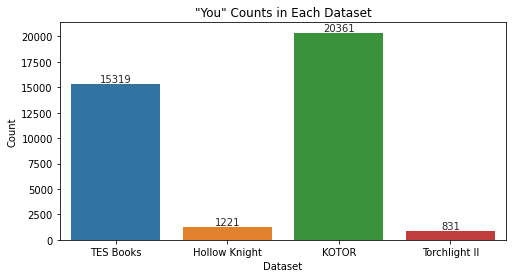

In [5]:
counts = np.array([])

for df in data.values():
    counts = np.append(counts, nf.locator(df['text'], you_re))

plt.figure(figsize=(8,4))
nf.barplot(x=list(data.keys()), y=counts, title='"You" Counts in Each Dataset', xlabel="Dataset", ylabel="Count")
plt.show()

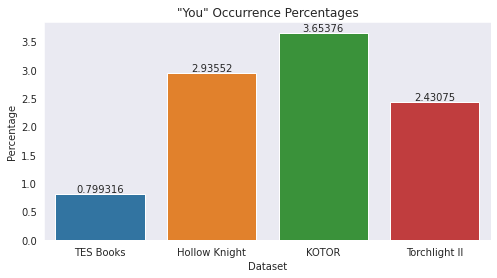

In [6]:
# Graph as percentages (I don't know how to display the % sign :( )
percentages = counts / [df['word_count'].sum() for df in data.values()] * 100

plt.figure(figsize=(8,4))
nf.barplot(x=list(data.keys()), y=percentages, title='"You" Occurrence Percentages', xlabel="Dataset", ylabel="Percentage")
plt.show()

This makes sense given that the data for _Hollow Knight_, _KOTOR_, and _Torchlight_ all relate to directing the player and giving the players objectives/quests in some way, shape, or form. The dataset pertaining to _The Elder Scrolls_ however, does not. Since its dataset is that of books written to be read by the player in-game, it makes sense that there is an extremely low frequency of the 2nd person pronoun. I expect this to change with other pronouns.
### "You" Concordances
Let's take a look at some of the contexts which the second person singular takes place in.

In [7]:
DISPLAY = 5

print("===================== \"You\" Concordance Samples =====================")
print("===================== TES Books =====================")
for sent in nf.concordances(es_df.sample(100, ignore_index=True), phrase='you', context_cols=['author', 'title'], num=DISPLAY, once_per=True):
    print(sent)

print("===================== Hollow Knight Dialogue =====================")
for sent in nf.concordances(hk_df.sample(10, ignore_index=True), phrase='you', context_cols=['character'], num=DISPLAY, once_per=True):
    print(sent)

print("===================== KOTOR Dialogue =====================")
for sent in nf.concordances(kotor_df.sample(100, ignore_index=True), phrase='you', context_cols=['speaker', 'listener'], num=DISPLAY, once_per=True):
    print(sent)

print("===================== Torchlight Quests =====================")
for sent in nf.concordances(tl_df.sample(100, ignore_index=True), phrase='you', context_cols=['speaker'], num=DISPLAY, once_per=True):
    print(sent)

===================== "You" Concordance Samples =====================
===================== TES Books =====================
Author: Anonymous | Title: baandari-peddler-note | Concordance:
	...This one assumes YOU understand now, yes?...
Author: Geocrates Varnus, ed. | Title: death-blow-abernanit | Concordance:
	...My foe, dark lord Dagoth Thras, before YOU slay me,...
Author: Speaker Gilzaron | Title: fan-false-face | Concordance:
	...I trust YOU with this job Rizikeh, so don't let...
Author: Ampyrian Brum | Title: gold-ribbon-merrit | Concordance:
	...Stryngpool and laughed: "I remember it because YOU used to run down it every time...
Author: Risa Uvaril | Title: risas-journal | Concordance:
	...If you're reading this, may YOU fare better on the Coiled Path than...
===================== Hollow Knight Dialogue =====================
Character: Divine | Concordance:
	...Did you call us? YOU called us, and we came. We came!...
Character: The Hunter | Concordance:
	...Tiny squib... You app

***
## Other Pronouns
Let's at the percentages for some other common pronouns: _I/me_, _he/she/him/her_, _we/us_, _they/them_. The reason I chose to go with these forms is because these forms can appear in the same contexts that _you_ would appear in. In other words, I'm simply leaving out posessive pronouns. Of course, just like with _you_, I have to consider some contractions, but those have been treated the same way as before.

In [8]:
# List of regexes
fp_re = re.compile(r"\b(?:I|me)\b") # Had to ignore case for this one
tp_re = re.compile(r"\b(?:(?:s)?he|(?:h)(?:er|im))\b", re.I)
fpp_re = re.compile(r"\b(?:we|us)\b", re.I)
tpp_re = re.compile(r"\bthe(?:y|m)\b", re.I)

re_dict = {"First Person Singular": fp_re, "Third Person Singular": tp_re, "First Person Plural": fpp_re, "Third Person Plural": tpp_re}

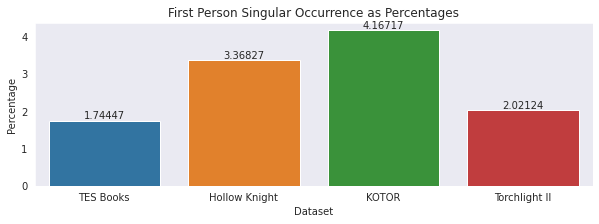

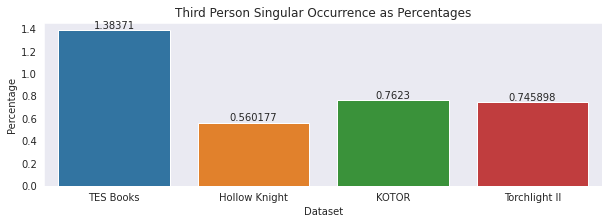

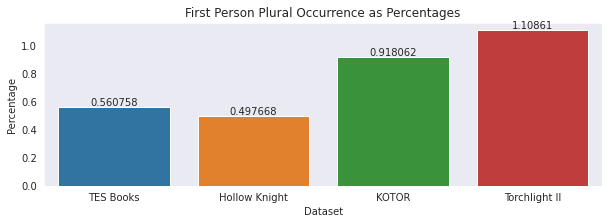

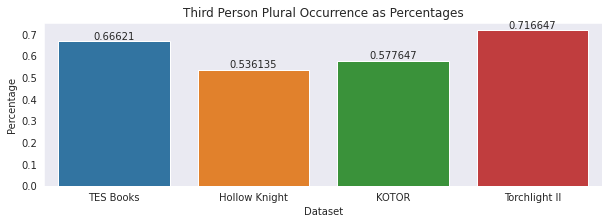

In [9]:
# Loop through everything
for pronoun in re_dict.keys():

    percentages = np.array([])

    plt.figure(figsize=(10, 3))

    for df in data.values():
        percentages = np.append(percentages, nf.locator(df['text'], re_dict[pronoun])/df['word_count'].sum())

    nf.barplot(x=list(data.keys()), y=percentages*100, title=pronoun + ' Occurrence as Percentages', xlabel="Dataset", ylabel="Percentage")

plt.show()